# <u> Credit Card Customer Segmentation</u>
- This project requires developing a customer segmentation to define marketing strategy.
- Unsupervised Machine Learning - There is no target variable

#### Tasks to perform
- Prepare intelligent KPI's
- Provide detailed insights based on the analysis
- Cluster Analysis
- Provide strategic insights

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

- Load Dataset

In [2]:
creditcarddata = pd.read_csv("CC_GENERAL.csv")

In [3]:
creditcarddata.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12



### <b>DATA DICTIONARY:</b>


<b>CUST_ID:</b> Credit card holder ID<br>
 <b>BALANCE:</b>  Monthly average balance (based on daily balance averages)<br>
 <b>BALANCE_FREQUENCY:</b>  Ratio of last 12 months with balance<br>
 <b>PURCHASES: </b> Total purchase amount spent during last 12 months<br>
 <b>ONEOFF_PURCHASES: </b> Total amount of one-off purchases<br>
 <b>INSTALLMENTS_PURCHASES: </b> Total amount of installment purchases<br>
 <b>CASH_ADVANCE: </b> Total cash-advance amount<br>
 <b>PURCHASES_FREQUENCY: </b> Frequency of purchases (Percent of months with at least one purchase)<br>
 <b>ONEOFF_PURCHASES_FREQUENCY: </b> Frequency of one-off-purchases<br>
 <b>PURCHASES_INSTALLMENTS_FREQUENCY: </b> Frequency of installment purchases<br>
 <b>CASH_ADVANCE_FREQUENCY: </b> Cash-Advance frequency<br>
 <b>AVERAGE_PURCHASE_TRX:</b>  Average amount per purchase transaction<br>
 <b>CASH_ADVANCE_TRX: </b> Average amount per cash-advance transaction<br>
 <b>PURCHASES_TRX: </b> Average amount per purchase transaction<br>
 <b>CREDIT_LIMIT:</b>  Credit limit<br>
 <b>PAYMENTS: </b> Total payments (due amount paid by the customer to decrease their statement balance) in the period<br>
 <b>MINIMUM_PAYMENTS: </b> Total minimum payments due in the period.<br>
 <b>PRC_FULL_PAYMEN: </b> Percentage of months with full payment of the due statement balance<br>
 <b>TENURE: </b> Number of months as a customer<br>


In [4]:
# Apply Seaborn style directly
sns.set_style("whitegrid")

## Exploratory Data Analysis

In [5]:
### data dimensions

creditcarddata.shape

(8950, 18)

In [6]:
## Data Types
creditcarddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
### Checking for Missing Values

creditcarddata.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- There are some missing values in CREDIT_LIMIT and MINIMUM_PAYMENTS

In [8]:
##Checking the missing value count for CREDIT LIMIT

creditcarddata['CREDIT_LIMIT'].isnull().value_counts()

CREDIT_LIMIT
False    8949
True        1
Name: count, dtype: int64

In [9]:
##Checking missing value count for MINIMUM PAYMENTS

creditcarddata['MINIMUM_PAYMENTS'].isnull().value_counts()

MINIMUM_PAYMENTS
False    8637
True      313
Name: count, dtype: int64

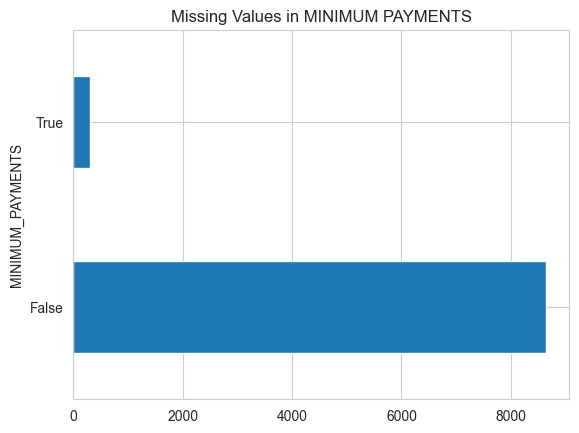

In [10]:
creditcarddata['MINIMUM_PAYMENTS'].isnull().value_counts().plot.barh()

plt.title("Missing Values in MINIMUM PAYMENTS")
plt.show()

- Descriptive Analysis of data

In [11]:
print(creditcarddata["MINIMUM_PAYMENTS"].describe())

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64


In [12]:
## Intital descriptive analysis of the data

creditcarddata.describe(percentiles=[.25,0.50,0.75,0.90]).T

,count,mean,std,min,25%,50%,75%,90%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,4338.563657,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,2542.624000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,1600.099000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,1140.070000,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,3065.534560,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,0.750000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,0.416667,1.50000


### Missing Value Treatment

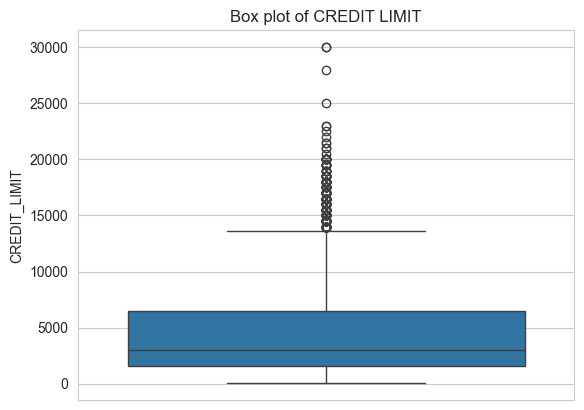

In [13]:
##Checking the distribution of 'CREDIT LIMIT'

sns.boxplot(y = "CREDIT_LIMIT", data=creditcarddata)
plt.title("Box plot of CREDIT LIMIT")

plt.show()

- From the boxplot we have seen the data is skewed, so we will use median to impute the missing data

In [14]:
#Impute with median

creditcarddata['CREDIT_LIMIT'].fillna(creditcarddata['CREDIT_LIMIT'].median(),inplace = True)

In [15]:
#Rechecking whether imputing sucessfull or not
creditcarddata['CREDIT_LIMIT'].isnull().sum()

0

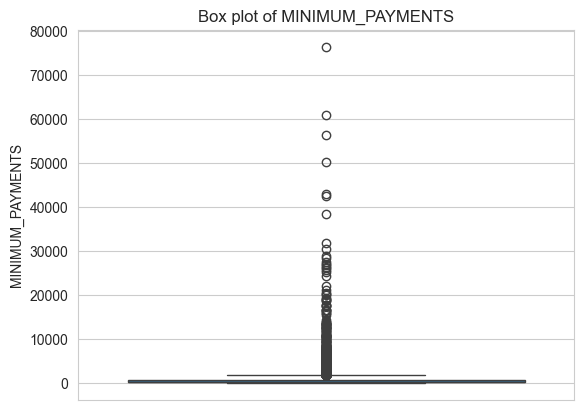

In [16]:
##Checking the distribution of 'MINIMUM_PAYMENTS'

sns.boxplot(y = "MINIMUM_PAYMENTS", data=creditcarddata)
plt.title("Box plot of MINIMUM_PAYMENTS")

plt.show()

- From the boxplot we have seen the data is skewed, so we will use median to impute the missing data

In [17]:
#Impute with median

creditcarddata['MINIMUM_PAYMENTS'].fillna(creditcarddata['MINIMUM_PAYMENTS'].median(),inplace = True)

In [18]:
#Rechecking whether imputing sucessfull or not
creditcarddata['MINIMUM_PAYMENTS'].isnull().sum()

0

**Observations**
- There are 8950 observations and 18 features
- 18 Numerical columns
- There were missing values in 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS'
- Data is skewed in CREDIT_LIMIT and MINIMUM_PAYMENTS
- We have used median to impute the missing value data

----

## Deriving New KPI

---

#### Monthly Average Purchase

In [19]:
creditcarddata["Monthly_Avg_Purchase"] = creditcarddata["PURCHASES"]/creditcarddata["TENURE"]

In [20]:
creditcarddata["Monthly_Avg_Purchase"].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_Avg_Purchase, dtype: float64

#### Monthly cash advance amount

In [21]:
creditcarddata["Monthly_Cash_Advance"] = creditcarddata["CASH_ADVANCE"]/creditcarddata["TENURE"]

### Purchase Type

In [22]:
creditcarddata.loc[:,["ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES"]].head()

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.4
1,0.00,0.0
2,773.17,0.0
3,1499.00,0.0
4,16.00,0.0


- Deriving the categorical variable based on user behaviour

In [23]:
def purchasetype(x):    
    if (x["ONEOFF_PURCHASES"] == 0) & (x["INSTALLMENTS_PURCHASES"] == 0):
        return("NONE")
    elif (x["ONEOFF_PURCHASES"] > 0) & (x["INSTALLMENTS_PURCHASES"] == 0):
        return("ONEOFF")
    elif (x["ONEOFF_PURCHASES"] == 0) & (x["INSTALLMENTS_PURCHASES"] > 0):
        return("INSTALLMENTS")
    elif (x["ONEOFF_PURCHASES"] > 0) & (x["INSTALLMENTS_PURCHASES"] > 0):
        return("BOTH_ONEOFF_INSTALLMENTS")

In [24]:
creditcarddata["Purchase_Type"] = creditcarddata.apply(purchasetype,axis=1)

In [25]:
creditcarddata["Purchase_Type"].value_counts()

Purchase_Type
BOTH_ONEOFF_INSTALLMENTS    2774
INSTALLMENTS                2260
NONE                        2042
ONEOFF                      1874
Name: count, dtype: int64

### Limit usage

- Balance to credit limit ratio

- The "balance credit ratio" is a financial metric used to evaluate the proportion of credit or debt relative to the total balance or assets. 

In [26]:
creditcarddata["Balance_Credit_Ratio"] = creditcarddata["BALANCE"]/creditcarddata["CREDIT_LIMIT"]

In [27]:
creditcarddata.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Purchase_Type,Balance_Credit_Ratio
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,INSTALLMENTS,0.040901
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,NONE,0.457495
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,ONEOFF,0.332687
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,ONEOFF,0.222223
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,ONEOFF,0.681429


### Payments to Minimum Payments Ratio
- Total Payment Ratio: calculated by dividing your total monthly credit payments by the total minimum due

In [28]:
#added where clause to avoid division by zero

creditcarddata["Total_Payment_Ratio"] = np.where(creditcarddata["MINIMUM_PAYMENTS"] == 0,creditcarddata["MINIMUM_PAYMENTS"], creditcarddata["PAYMENTS"]/creditcarddata["MINIMUM_PAYMENTS"])

In [29]:
creditcarddata = creditcarddata.round(2)

In [30]:
creditcarddata.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Purchase_Type,Balance_Credit_Ratio,Total_Payment_Ratio
0,C10001,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,...,1000.0,201.80,139.51,0.00,12,7.95,0.00,INSTALLMENTS,0.04,1.45
1,C10002,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,...,7000.0,4103.03,1072.34,0.22,12,0.00,536.91,NONE,0.46,3.83
2,C10003,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,...,7500.0,622.07,627.28,0.00,12,64.43,0.00,ONEOFF,0.33,0.99
3,C10004,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,...,7500.0,0.00,312.34,0.00,12,124.92,17.15,ONEOFF,0.22,0.00
4,C10005,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,...,1200.0,678.33,244.79,0.00,12,1.33,0.00,ONEOFF,0.68,2.77


---

## Insights from new KPIs

---

In [31]:
#Average Total Payment Ratio  for each purchase type



              Purchase_Type  Total_Payment_Ratio
0  BOTH_ONEOFF_INSTALLMENTS             7.237087
1              INSTALLMENTS            13.259013
2                      NONE            10.087311
3                    ONEOFF             5.571051


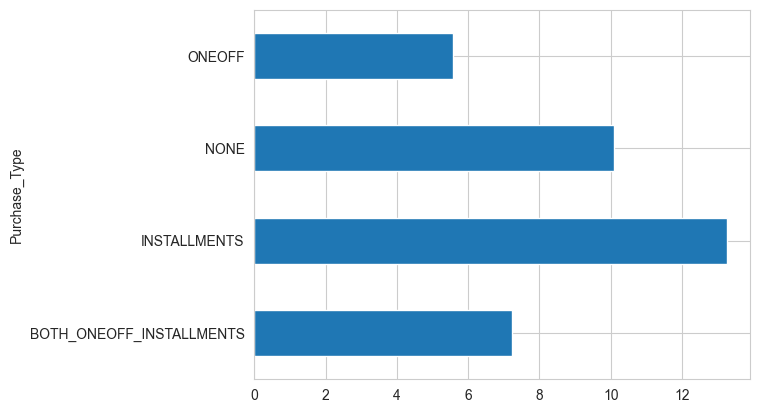

In [32]:
#checking the total payment ratio based on purchase type
x = creditcarddata[["Purchase_Type","Total_Payment_Ratio"]].groupby(["Purchase_Type"]).agg("mean").reset_index()
print(x)
creditcarddata.groupby("Purchase_Type").apply(lambda x: np.mean(x["Total_Payment_Ratio"])).plot.barh()
plt.show()

Purchase_Type
BOTH_ONEOFF_INSTALLMENTS     67.821997
INSTALLMENTS                 38.398181
NONE                        182.858203
ONEOFF                       78.995955
dtype: float64


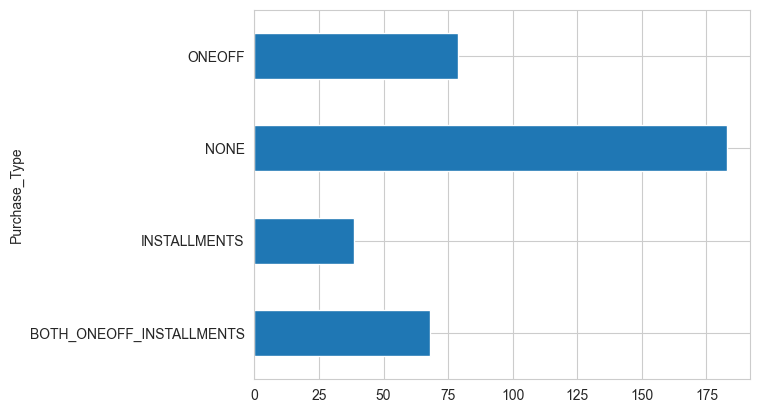

In [33]:
a=creditcarddata.groupby('Purchase_Type').apply(lambda x : np.mean(x['Monthly_Cash_Advance']))
print(a)
a.plot.barh()
plt.show()

#### Insights
- Customers with installment payments are paying dues
- Customers who do not do ONOFF or INSTALLMENTS take more cash advance
- Customers with installment purchases have good credit score

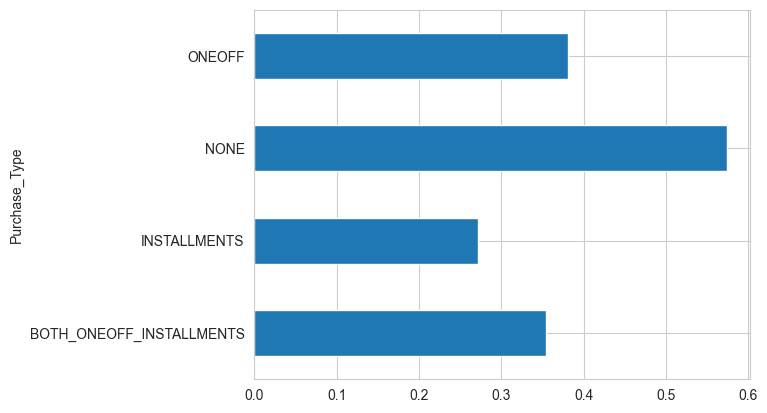

In [34]:
#balance to credit ratio (limit usage ratio) is more then the customers will have good credit score

creditcarddata.groupby("Purchase_Type").apply(lambda x: np.mean(x["Balance_Credit_Ratio"])).plot.barh()
plt.show()

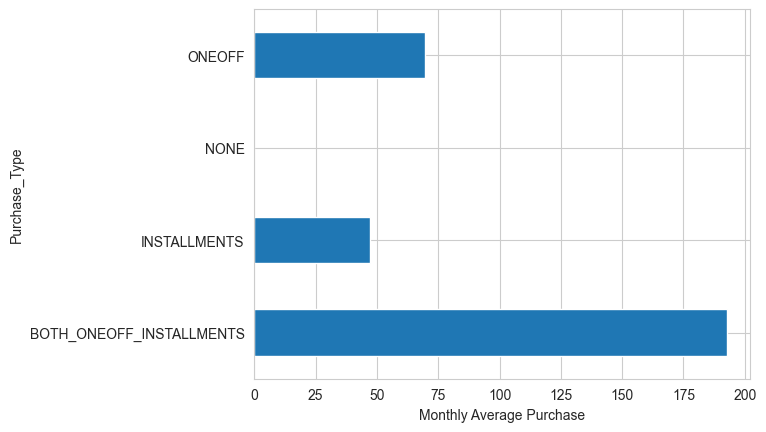

In [35]:
#checking the monthly average purchases based on payment type
creditcarddata.groupby("Purchase_Type").apply(lambda x: np.mean(x["Monthly_Avg_Purchase"])).plot.barh()
plt.xlabel("Monthly Average Purchase")
plt.show()

Customers using both oneoff and installment payment has more monthly average purchases

### Data Segregation
- Handling Categorical Variable

In [36]:
#getting the numeric variable names and data
creditcarddata_numeric = creditcarddata._get_numeric_data()

In [37]:
numeric_variable_names =  list(creditcarddata_numeric.columns)

In [38]:
numeric_variable_names

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'Monthly_Avg_Purchase',
 'Monthly_Cash_Advance',
 'Balance_Credit_Ratio',
 'Total_Payment_Ratio']

There are many variables having extreme values, so doing the log transformation on the dataset to remove the outlier effect

In [39]:
#log transformation

credit_log = creditcarddata_numeric.apply(lambda x: np.log(x + 1))

In [40]:
credit_log.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,6.161638,2.013303,0.000000,4.861981,6.773521,7.628098,9.854515
BALANCE_FREQUENCY,8950.0,0.619992,0.148856,0.000000,0.636577,0.693147,0.693147,0.693147
PURCHASES,8950.0,4.899647,2.916872,0.000000,3.704627,5.892417,7.013133,10.800403
ONEOFF_PURCHASES,8950.0,3.204274,3.246365,0.000000,0.000000,3.663562,6.360274,10.615512
INSTALLMENTS_PURCHASES,8950.0,3.352403,3.082973,0.000000,0.000000,4.499810,6.151961,10.021315
CASH_ADVANCE,8950.0,3.319086,3.566298,0.000000,0.000000,0.000000,7.016450,10.760839
PURCHASES_FREQUENCY,8950.0,0.361112,0.277560,0.000000,0.076961,0.405465,0.652325,0.693147
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.158423,0.216834,0.000000,0.000000,0.076961,0.262364,0.693147
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.270125,0.281965,0.000000,0.000000,0.157004,0.559616,0.693147
CASH_ADVANCE_FREQUENCY,8950.0,0.113286,0.156823,0.000000,0.000000,0.000000,0.198851,0.916291


In [41]:
#categorical variable names
catergorical_variable_names = [x for x in list(creditcarddata.columns) if x not in numeric_variable_names]

In [42]:
catergorical_variable_names

['CUST_ID', 'Purchase_Type']

In [43]:
#removing the customer id as it is not significant
catergorical_variable_names.remove("CUST_ID")

- Converting to Dummy Variables

In [44]:
dummies = pd.get_dummies(creditcarddata[catergorical_variable_names])

In [45]:
dummies.head()

,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
0,False,True,False,False
1,False,False,True,False
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True


In [46]:
pd.concat([creditcarddata,dummies],axis=1).head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Purchase_Type,Balance_Credit_Ratio,Total_Payment_Ratio,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
0,C10001,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,...,12,7.95,0.00,INSTALLMENTS,0.04,1.45,False,True,False,False
1,C10002,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,...,12,0.00,536.91,NONE,0.46,3.83,False,False,True,False
2,C10003,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,...,12,64.43,0.00,ONEOFF,0.33,0.99,False,False,False,True
3,C10004,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,...,12,124.92,17.15,ONEOFF,0.22,0.00,False,False,False,True
4,C10005,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,...,12,1.33,0.00,ONEOFF,0.68,2.77,False,False,False,True


In [47]:
#keeping an orignal data copy

creditcarddata_org = pd.concat([creditcarddata,dummies],axis=1)

In [48]:
#creditcarddata_org.mean()

In [49]:
#merging the log data and dummies data
creditcarddata_merged = pd.concat([credit_log,dummies],axis = 1)

In [50]:
##dropping the variables used to create the KPI
var_names = ["BALANCE","PURCHASES","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","TENURE","CASH_ADVANCE","CREDIT_LIMIT"]


creditcarddata_new = creditcarddata_merged[[x for x in creditcarddata_merged.columns if x not in var_names]]

In [51]:
creditcarddata_new.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,Total_Payment_Ratio,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
0,0.598837,0.000000,4.568506,0.157004,0.000000,0.076961,0.000000,0.000000,1.098612,2.191654,0.000000,0.039221,0.896088,False,True,False,False
1,0.647103,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287691,0.378436,1.574846,False,False,True,False
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180981,0.000000,0.285179,0.688135,False,False,False,True
3,0.494696,7.313220,0.000000,0.076961,0.076961,0.000000,0.076961,0.693147,0.693147,4.835647,2.898671,0.198851,0.000000,False,False,False,True
4,0.693147,2.833213,0.000000,0.076961,0.076961,0.000000,0.000000,0.000000,0.693147,0.845868,0.000000,0.518794,1.327075,False,False,False,True


In [52]:
#datatypes of new dataframe

creditcarddata_new.dtypes

BALANCE_FREQUENCY                         float64
ONEOFF_PURCHASES                          float64
INSTALLMENTS_PURCHASES                    float64
PURCHASES_FREQUENCY                       float64
ONEOFF_PURCHASES_FREQUENCY                float64
PURCHASES_INSTALLMENTS_FREQUENCY          float64
CASH_ADVANCE_FREQUENCY                    float64
CASH_ADVANCE_TRX                          float64
PURCHASES_TRX                             float64
Monthly_Avg_Purchase                      float64
Monthly_Cash_Advance                      float64
Balance_Credit_Ratio                      float64
Total_Payment_Ratio                       float64
Purchase_Type_BOTH_ONEOFF_INSTALLMENTS       bool
Purchase_Type_INSTALLMENTS                   bool
Purchase_Type_NONE                           bool
Purchase_Type_ONEOFF                         bool
dtype: object

### Check for multicollinearity

In [53]:
#correlation matrix

creditcarddata_new.corr()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,Total_Payment_Ratio,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
BALANCE_FREQUENCY,1.000000,0.140011,0.110737,0.212020,0.199246,0.162496,0.194964,0.191120,0.197661,0.136655,0.153206,0.452558,-0.153108,0.191332,-0.134297,0.011392,-0.085826
ONEOFF_PURCHASES,0.140011,1.000000,0.161434,0.393549,0.812792,0.097203,-0.128254,-0.144803,0.574393,0.712305,-0.182490,-0.063056,0.236802,0.661126,-0.573717,-0.536671,0.414662
INSTALLMENTS_PURCHASES,0.110737,0.161434,1.000000,0.804250,0.191702,0.905355,-0.309380,-0.335621,0.782683,0.687568,-0.377478,-0.217464,0.185808,0.607277,0.448744,-0.591238,-0.559631
PURCHASES_FREQUENCY,0.212020,0.393549,0.804250,1.000000,0.503709,0.857019,-0.344712,-0.382300,0.921747,0.816756,-0.433223,-0.232964,0.196354,0.521632,0.309963,-0.707119,-0.194572
ONEOFF_PURCHASES_FREQUENCY,0.199246,0.812792,0.191702,0.503709,1.000000,0.143712,-0.122523,-0.145779,0.621777,0.624033,-0.178047,-0.080859,0.259715,0.555684,-0.424674,-0.397252,0.231569
PURCHASES_INSTALLMENTS_FREQUENCY,0.162496,0.097203,0.905355,0.857019,0.143712,1.000000,-0.290063,-0.315110,0.769830,0.613860,-0.354119,-0.191249,0.141595,0.486772,0.446448,-0.520620,-0.493043
CASH_ADVANCE_FREQUENCY,0.194964,-0.128254,-0.309380,-0.344712,-0.122523,-0.290063,1.000000,0.936110,-0.326467,-0.340227,0.825831,0.432835,-0.130852,-0.103763,-0.252529,0.402654,-0.027705
CASH_ADVANCE_TRX,0.191120,-0.144803,-0.335621,-0.382300,-0.145779,-0.315110,0.936110,1.000000,-0.357895,-0.378009,0.902805,0.467670,-0.146754,-0.109572,-0.279532,0.448072,-0.039111
PURCHASES_TRX,0.197661,0.574393,0.782683,0.921747,0.621777,0.769830,-0.326467,-0.357895,1.000000,0.899851,-0.414204,-0.194133,0.237142,0.620589,0.161920,-0.749516,-0.105244
Monthly_Avg_Purchase,0.136655,0.712305,0.687568,0.816756,0.624033,0.613860,-0.340227,-0.378009,0.899851,1.000000,-0.426931,-0.223222,0.290685,0.573881,0.089252,-0.828241,0.106638


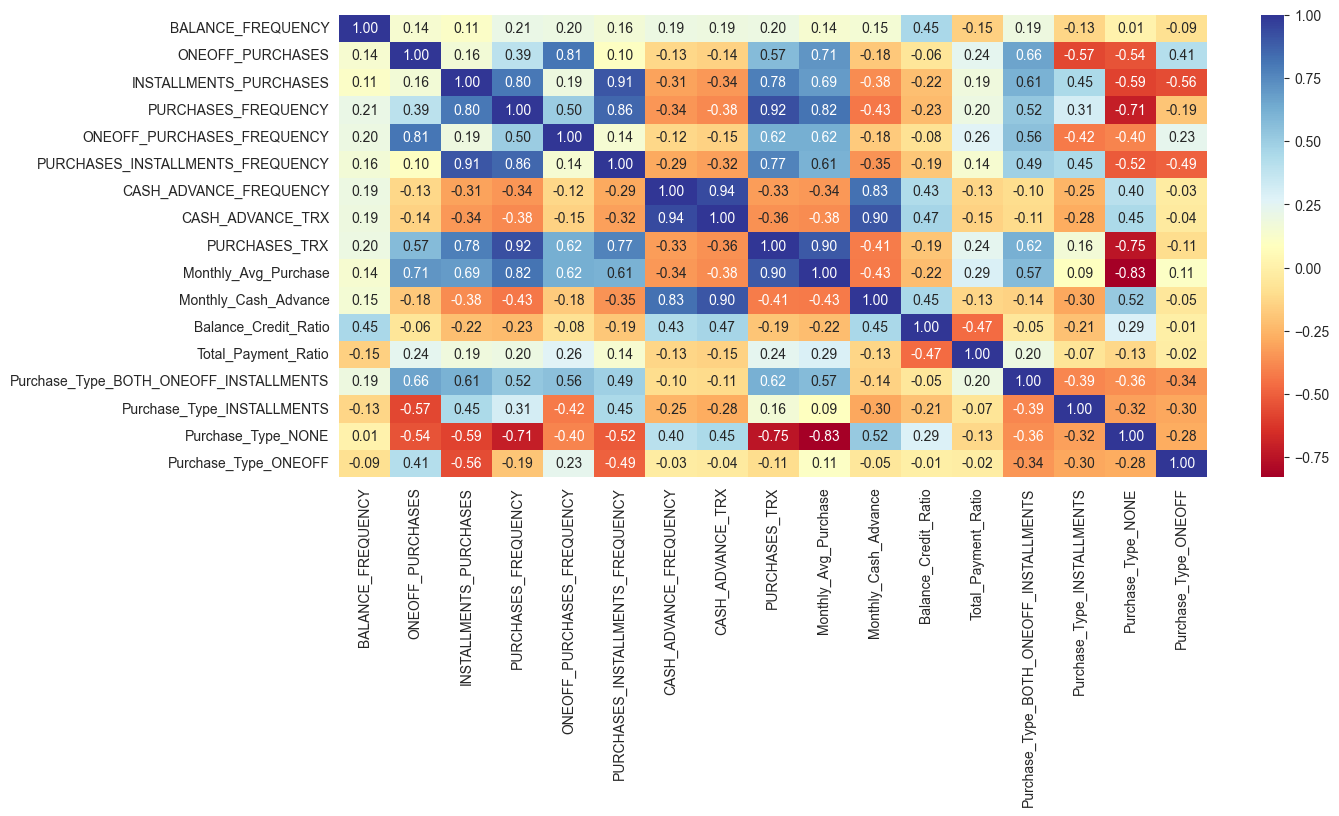

In [54]:
#creating a heatmap for better visualization
plt.figure(figsize=(14,6))
sns.heatmap(creditcarddata_new.corr(),annot=True,fmt=".2f",cmap="RdYlBu")
plt.show()

<big>
- Heat map shows that many features are co-related so applying dimension reduction will help negating multi-colinearity in data.
</big>

- Before applying the PCA we will standardize data to avoid effect of scale on the result. Scaling will make all features with equal weight.

### Standardization of data

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
#Create an object

sc = StandardScaler()

In [57]:
creditcard_scaled = sc.fit_transform(creditcarddata_new)

In [58]:
pd.DataFrame(creditcard_scaled).describe().T

,count,mean,std,min,25%,50%,75%,max
0,8950.0,4.382342e-16,1.000056,-4.165266,0.111424,0.491479,0.491479,0.491479
1,8950.0,0.000000e+00,1.000056,-0.987090,-0.987090,0.141485,0.972218,2.283062
2,8950.0,1.034058e-16,1.000056,-1.087454,-1.087454,0.372196,0.908121,2.163264
3,8950.0,-9.526830e-18,1.000056,-1.301095,-1.023803,0.159806,1.049250,1.196332
4,8950.0,1.714829e-16,1.000056,-0.730659,-0.730659,-0.375708,0.479387,2.466195
5,8950.0,-1.143220e-16,1.000056,-0.958062,-0.958062,-0.401211,1.026748,1.500349
6,8950.0,6.986342e-17,1.000056,-0.722422,-0.722422,-0.722422,0.545641,5.120722
7,8950.0,-5.795488e-17,1.000056,-0.810069,-0.810069,-0.810069,0.784603,3.965987
8,8950.0,1.397268e-16,1.000056,-1.379210,-0.874655,0.134455,0.724746,2.903371
9,8950.0,-4.922195e-17,1.000056,-1.523368,-0.783856,0.221531,0.767166,2.628856


### PCA

In [59]:
from sklearn.decomposition import PCA

In [60]:
#applying the PCA to find the number of factors

variance_ratio = {}
for n in range(2,18):
    pc = PCA(n_components=n)
    cr_pca = pc.fit(creditcard_scaled)
    variance_ratio[n] = sum(cr_pca.explained_variance_ratio_)

In [61]:
#ratio of variance explained 
variance_ratio

{2: 0.5824607599200575,
 3: 0.7297466434636775,
 4: 0.8113282252273153,
 5: 0.8768561357190723,
 6: 0.9184810955062332,
 7: 0.9409751162847559,
 8: 0.96155340062938,
 9: 0.9739448843439259,
 10: 0.9835980480783891,
 11: 0.9897248725782216,
 12: 0.9927531994176729,
 13: 0.9953959123246199,
 14: 0.9979644752646766,
 15: 0.9996366026820452,
 16: 1.0,
 17: 1.0}

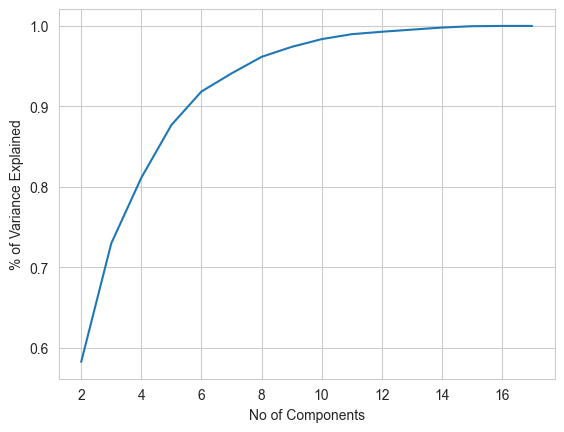

In [62]:
#plotting the graph

pd.Series(variance_ratio).plot()
plt.xlabel("No of Components")
plt.ylabel("% of Variance Explained")
plt.show()

<big>
- Since 5 Components are explaining about 88% of the variance we select 5 components
</big>

In [63]:
final_pc = PCA(n_components=5).fit(creditcard_scaled)

reduced_creditdata = final_pc.fit_transform(creditcard_scaled)

In [64]:
reduced_creditdata

array([[-0.24167803,  2.75698173,  0.33973438, -0.41816015, -0.00500094],
       [-3.97546459, -0.14914102, -0.54683836,  1.02101718, -0.43010905],
       [ 1.28679062, -1.50228467,  2.71262878, -1.88826263,  0.01144199],
       ...,
       [ 1.15750898,  2.80407703, -0.53482635, -0.66879231,  0.33146204],
       [-3.25564944,  1.01009669,  0.46572298,  0.81626239, -1.11665502],
       [ 0.24743297, -2.2227972 ,  1.8437027 , -1.11291989,  1.73761568]])

In [65]:
#main data set has 17 components
creditcard_scaled.shape

(8950, 17)

In [66]:
#after doing pca we got 5 components
reduced_creditdata.shape

(8950, 5)

In [67]:
column_names = creditcarddata_new.columns
column_names

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_Avg_Purchase',
       'Monthly_Cash_Advance', 'Balance_Credit_Ratio', 'Total_Payment_Ratio',
       'Purchase_Type_BOTH_ONEOFF_INSTALLMENTS', 'Purchase_Type_INSTALLMENTS',
       'Purchase_Type_NONE', 'Purchase_Type_ONEOFF'],
      dtype='object')

- Visualizing the reduced factors

In [68]:
pd.DataFrame(final_pc.components_.T,columns=['PC_' + str(i) for i in range(5)],index=column_names)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,0.029847,-0.240297,-0.262754,-0.353524,-0.228764
ONEOFF_PURCHASES,0.214081,-0.405781,0.240049,0.001340,-0.023165
INSTALLMENTS_PURCHASES,0.312163,0.098002,-0.315571,0.087945,-0.002057
PURCHASES_FREQUENCY,0.345816,-0.016014,-0.163088,-0.074366,0.115332
ONEOFF_PURCHASES_FREQUENCY,0.214669,-0.361716,0.163291,0.036587,-0.051420
PURCHASES_INSTALLMENTS_FREQUENCY,0.295541,0.111518,-0.330038,0.023473,0.025880
CASH_ADVANCE_FREQUENCY,-0.213932,-0.286571,-0.278261,0.096093,0.360749
CASH_ADVANCE_TRX,-0.229368,-0.292065,-0.284771,0.103467,0.332620
PURCHASES_TRX,0.355594,-0.106799,-0.102334,-0.054427,0.104945
Monthly_Avg_Purchase,0.346031,-0.141640,0.024457,-0.079612,0.194129


In [69]:
pd.DataFrame(final_pc.explained_variance_ratio_,columns=["Variance Ratio"],index=["PC_" + str(i) for i in range(5)])

,Variance Ratio
PC_0,0.401937
PC_1,0.180524
PC_2,0.147286
PC_3,0.081582
PC_4,0.065528


#### Loading Matrix

Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components.

### Clustering
- Find the optimum number of clusters using Silhoutte Coefficient

In [70]:
from sklearn import metrics
from sklearn.cluster import KMeans

In [71]:
scores = []
inertia = []
k_range = range(3, 12)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(creditcard_scaled)
    scores.append(metrics.silhouette_score(creditcard_scaled, km.labels_))
    inertia.append(km.inertia_)

In [72]:
scores

[0.31677629527868134,
 0.3883321935622073,
 0.35132935728236636,
 0.35124683060615686,
 0.3447917172088093,
 0.31867268374886104,
 0.3192021898280947,
 0.31453527980230495,
 0.3266641079573144]

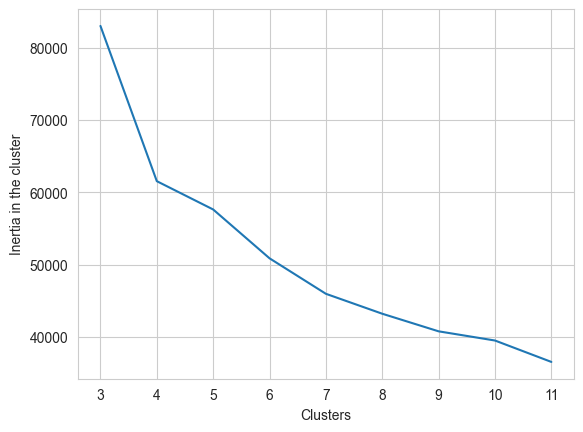

In [73]:
plt.plot(k_range,inertia)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

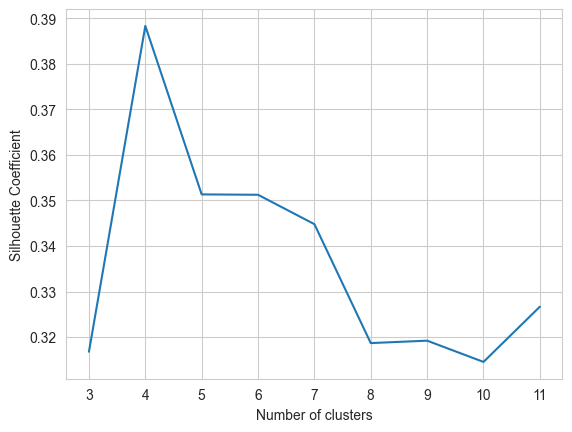

In [74]:
#plotting the sc scores
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Insights
- From SC Score, the number of optimal clusters could be 4 or 5

### Profiling
- To find the right clustering we will do profiling for 4, 5 clusters

### 4-Cluster Solution

In [75]:
km_4 = KMeans(n_clusters=4,random_state=123)

In [76]:
#fitting the Kmeans 
km_4.fit(reduced_creditdata)
km_4.labels_

array([0, 1, 3, ..., 0, 1, 3])

In [77]:
#proportion of labels classified

pd.Series(km_4.labels_).value_counts()

2    2758
0    2229
1    2089
3    1874
Name: count, dtype: int64

<big>
Plotting the 4 cluster Solution labels    
</big>

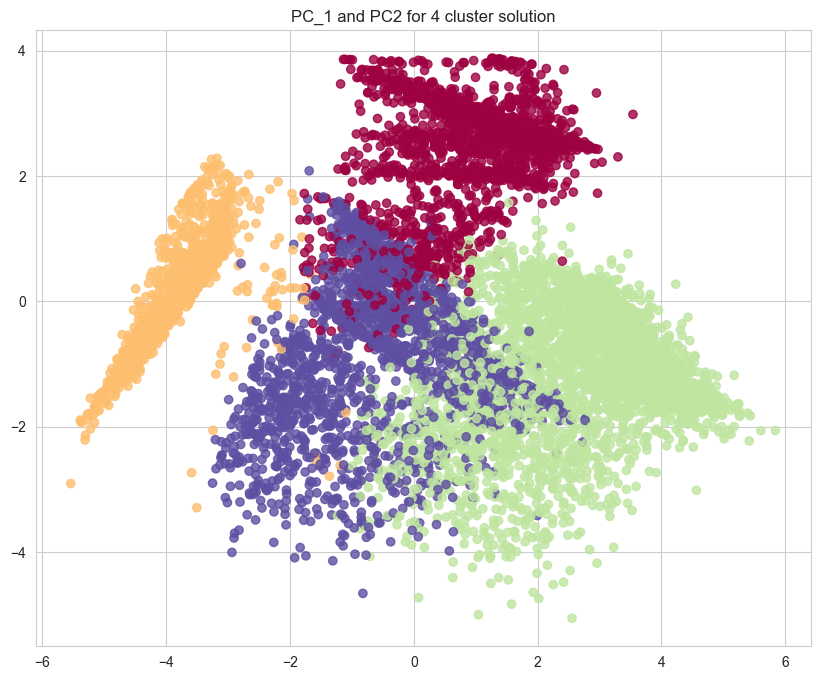

In [78]:
plt.figure(figsize=(10, 8 ))
plt.scatter(reduced_creditdata[:, 0], reduced_creditdata[:, 1], c = km_4.labels_, cmap = "Spectral", alpha = 0.8)
plt.title("PC_1 and PC2 for 4 cluster solution")
plt.show()

<big> 
    Taking the key performance index variables for analysis
</big>

In [80]:
col_key_kpi = ["PURCHASES_TRX","Monthly_Avg_Purchase","Monthly_Cash_Advance","Balance_Credit_Ratio","CASH_ADVANCE_TRX","Total_Payment_Ratio","Purchase_Type_INSTALLMENTS","Purchase_Type_NONE","Purchase_Type_BOTH_ONEOFF_INSTALLMENTS","Purchase_Type_ONEOFF","CREDIT_LIMIT"]

In [81]:
#making a dataframe with 4 cluster solution labels

cluster_df_4 = pd.concat([creditcarddata_org[col_key_kpi], pd.Series(km_4.labels_,name="Cluster_4")], axis =1)

In [82]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,CASH_ADVANCE_TRX,Total_Payment_Ratio,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_ONEOFF,CREDIT_LIMIT,Cluster_4
0,2,7.95,0.00,0.04,0,1.45,True,False,False,False,1000.0,0
1,0,0.00,536.91,0.46,4,3.83,False,True,False,False,7000.0,1
2,12,64.43,0.00,0.33,0,0.99,False,False,False,True,7500.0,3
3,1,124.92,17.15,0.22,1,0.00,False,False,False,True,7500.0,3
4,1,1.33,0.00,0.68,0,2.77,False,False,False,True,1200.0,3


#### Grouping the data based on cluster.

#### Mean gives a good indication of the distribution of data. so we are finding the mean for each variable for each cluster 


In [83]:
cluster_4 = cluster_df_4.groupby('Cluster_4').apply(lambda x: x[col_key_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,12.049349,0.044998,33.125453,7.118997
Monthly_Avg_Purchase,47.553876,0.157688,193.696041,69.758170
Monthly_Cash_Advance,33.481377,186.380235,67.620018,77.843474
Balance_Credit_Ratio,0.264459,0.576103,0.354572,0.378629
CASH_ADVANCE_TRX,1.020637,6.553854,2.807107,2.864995
Total_Payment_Ratio,13.397622,9.931565,7.268709,5.561393
Purchase_Type_INSTALLMENTS,0.998205,0.016754,0.000000,0.000000
Purchase_Type_NONE,0.000000,0.977501,0.000000,0.000000
Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,0.001795,0.002393,1.000000,0.003735
Purchase_Type_ONEOFF,0.000000,0.003351,0.000000,0.996265


In [84]:
def ClusterPercentage(datafr,name):
    """Common utility function to calculate the percentage and size of cluster"""
    
    size = pd.Series(datafr[name].value_counts().sort_index())
    percent = pd.Series(round(datafr[name].value_counts()/datafr.shape[0] * 100,2)).sort_index()

    size_df = pd.concat([size, percent],axis=1)
    size_df.columns = ["Cluster_Size","Cluster_Percentage"]
    
    return(size_df)

In [85]:
ClusterPercentage(cluster_df_4,"Cluster_4")

,Cluster_Size,Cluster_Percentage
Cluster_4,,
0,2229,24.91
1,2089,23.34
2,2758,30.82
3,1874,20.94


In [86]:
#transposing the cluster
cluster_4_T = cluster_4.T

In [87]:
cluster_4_T

,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,CASH_ADVANCE_TRX,Total_Payment_Ratio,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_ONEOFF,CREDIT_LIMIT
Cluster_4,,,,,,,,,,,
0,12.049349,47.553876,33.481377,0.264459,1.020637,13.397622,0.998205,0.000000,0.001795,0.000000,3334.739067
1,0.044998,0.157688,186.380235,0.576103,6.553854,9.931565,0.016754,0.977501,0.002393,0.003351,4056.949100
2,33.125453,193.696041,67.620018,0.354572,2.807107,7.268709,0.000000,0.000000,1.000000,0.000000,5750.015566
3,7.118997,69.758170,77.843474,0.378629,2.864995,5.561393,0.000000,0.000000,0.003735,0.996265,4512.905630


In [88]:
def ClusterAnalysis(datafr):
    """A function to analyze the KPI variables across each segment in the cluster and returns dataframe useful for plotting"""
    
    #Build a dataframe of KPI for each cluster suitable for plotting
    n = datafr.shape[0]
    
    mn_cash_advnce = pd.Series(np.log(datafr.reset_index(drop = True)["Monthly_Cash_Advance"]))
    balance_crdt_ratio = pd.Series(datafr.reset_index(drop = True)["Balance_Credit_Ratio"])
    mn_avg_purchases = pd.Series(np.log(datafr.reset_index(drop = True)["Monthly_Avg_Purchase"]))
    total_pymnt_ratio = pd.Series(datafr.reset_index(drop = True)["Total_Payment_Ratio"])
    installment = pd.Series(datafr.reset_index(drop = True)["Purchase_Type_INSTALLMENTS"])
    oneoff = pd.Series(datafr.reset_index(drop = True)["Purchase_Type_ONEOFF"])

    final_df = pd.concat([mn_cash_advnce,mn_avg_purchases,balance_crdt_ratio,total_pymnt_ratio,installment,oneoff],axis=1)
    final_df.columns=["Monthly_Cash_Advance","Monthly_Avg_Purchase","Balance_Credit_Ratio","Total_Payment_Ratio","Installments","Oneoff"]
    final_df.index = ["Cl-"+ str(i) for i in range(n)]

    
    return(final_df)
    

In [89]:
final_df_4 = ClusterAnalysis(cluster_4_T)
final_df_4

,Monthly_Cash_Advance,Monthly_Avg_Purchase,Balance_Credit_Ratio,Total_Payment_Ratio,Installments,Oneoff
Cl-0,3.510989,3.861863,0.264459,13.397622,0.998205,0.000000
Cl-1,5.227789,-1.847138,0.576103,9.931565,0.016754,0.003351
Cl-2,4.213904,5.266290,0.354572,7.268709,0.000000,0.000000
Cl-3,4.354700,4.245035,0.378629,5.561393,0.000000,0.996265


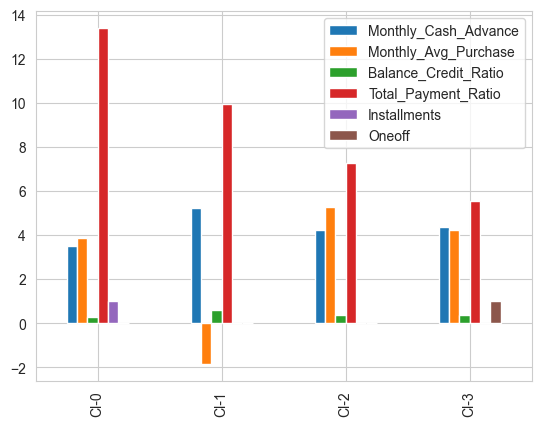

In [90]:
final_df_4.plot(kind = "bar")
#plt.xticks(["11","22","33","44"])
plt.show()

### Insights with 4 Clusters
----
<big>
- Cluster 0 customers have lowest balance to credit ratio (good credit score) and are paying dues also doing maximum installment purchases. <i>This group is about 25% of the total customer base</i><br>
- Cluster 1 customers are taking maximum advance cash and has high debt to credit ratio (poor credit rating) & not doing any purchase transcation.<i>This group is about 23% of the total customer base</i><br>
- Cluster 2 is the group of customers who have the highest Montly Average Purchases. <i>This group is about 31% of the total customer base </i><br>
- Cluster 3 customers are doing  maximum one off payments and least total payment ratio. <i>This group is about 21% of the total customer base</i><br>
   
----

### 5 Cluster Solution 

In [91]:
km_5 = KMeans(n_clusters=5,random_state=123)
km_5.fit(reduced_creditdata)

KMeans(n_clusters=5, random_state=123)

In [92]:
km_5.labels_

array([0, 1, 4, ..., 0, 1, 4])

In [93]:
#distribution of labels

pd.Series(km_5.labels_).value_counts()

0    2130
1    2084
2    1986
4    1860
3     890
Name: count, dtype: int64

<big>
Plotting the 5 Cluster Solution Labels
</big>

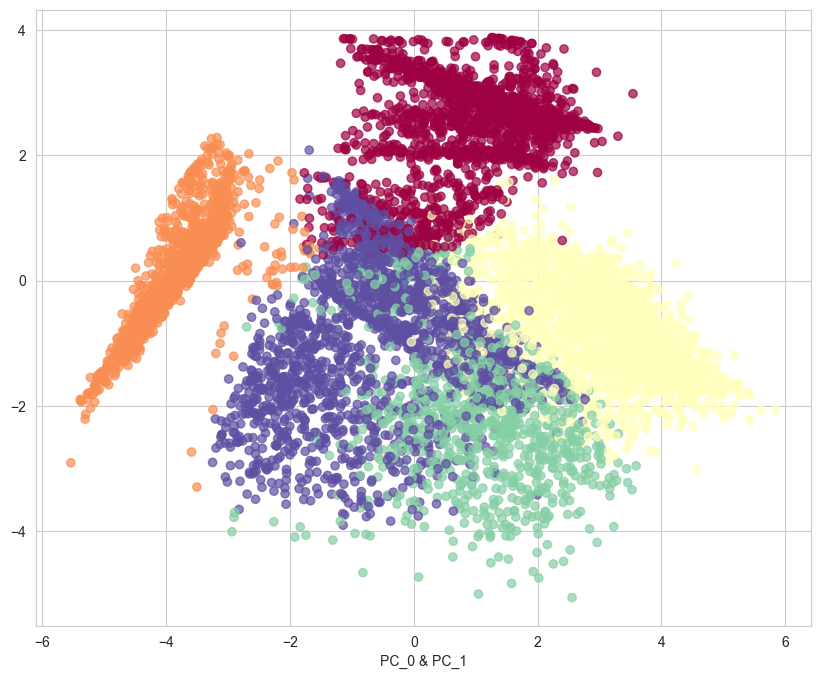

In [94]:
plt.figure(figsize=(10,8))
plt.scatter(reduced_creditdata[:,0],reduced_creditdata[:,1],c=km_5.labels_,cmap="Spectral",alpha = 0.7)
plt.xlabel("PC_0 & PC_1")
plt.show()

In [95]:
#5 cluster dataframe with labels

cluster_df_5 = pd.concat([creditcarddata_org[col_key_kpi],pd.Series(km_5.labels_,name="Cluster_5")], axis = 1)

In [96]:
cluster_df_5.head()

,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,CASH_ADVANCE_TRX,Total_Payment_Ratio,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_ONEOFF,CREDIT_LIMIT,Cluster_5
0,2,7.95,0.00,0.04,0,1.45,True,False,False,False,1000.0,0
1,0,0.00,536.91,0.46,4,3.83,False,True,False,False,7000.0,1
2,12,64.43,0.00,0.33,0,0.99,False,False,False,True,7500.0,4
3,1,124.92,17.15,0.22,1,0.00,False,False,False,True,7500.0,4
4,1,1.33,0.00,0.68,0,2.77,False,False,False,True,1200.0,4


In [97]:
#calculating the mean of all variables in the cluster

cluster_5 = cluster_df_5.groupby("Cluster_5").apply(lambda x: x[col_key_kpi].mean()).T
cluster_5

Cluster_5,0,1,2,3,4
PURCHASES_TRX,11.896714,0.035509,34.531219,27.543820,7.067742
Monthly_Avg_Purchase,47.239690,0.096569,209.699819,141.827652,68.685618
Monthly_Cash_Advance,19.154812,185.109535,4.027638,252.610876,73.635694
Balance_Credit_Ratio,0.246723,0.576291,0.263162,0.594584,0.377468
CASH_ADVANCE_TRX,0.480282,6.454894,0.152568,10.531461,2.648387
Total_Payment_Ratio,13.866221,9.950029,8.565287,3.925157,5.540070
Purchase_Type_INSTALLMENTS,1.000000,0.016795,0.000000,0.106742,0.000000
Purchase_Type_NONE,0.000000,0.979846,0.000000,0.000000,0.000000
Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,0.000000,0.000000,1.000000,0.878652,0.003226
Purchase_Type_ONEOFF,0.000000,0.003359,0.000000,0.014607,0.996774


In [98]:
#transposing the cluster
cluster_5_T = cluster_5.T
cluster_5_T

,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,CASH_ADVANCE_TRX,Total_Payment_Ratio,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_ONEOFF,CREDIT_LIMIT
Cluster_5,,,,,,,,,,,
0,11.896714,47.239690,19.154812,0.246723,0.480282,13.866221,1.000000,0.000000,0.000000,0.000000,3223.856047
1,0.035509,0.096569,185.109535,0.576291,6.454894,9.950029,0.016795,0.979846,0.000000,0.003359,4047.344851
2,34.531219,209.699819,4.027638,0.263162,0.152568,8.565287,0.000000,0.000000,1.000000,0.000000,5714.784960
3,27.543820,141.827652,252.610876,0.594584,10.531461,3.925157,0.106742,0.000000,0.878652,0.014607,5866.966292
4,7.067742,68.685618,73.635694,0.377468,2.648387,5.540070,0.000000,0.000000,0.003226,0.996774,4489.884489


In [99]:
ClusterPercentage(cluster_df_5,"Cluster_5")

,Cluster_Size,Cluster_Percentage
Cluster_5,,
0,2130,23.80
1,2084,23.28
2,1986,22.19
3,890,9.94
4,1860,20.78


In [100]:
final_df_5 = ClusterAnalysis(cluster_5_T)
final_df_5

,Monthly_Cash_Advance,Monthly_Avg_Purchase,Balance_Credit_Ratio,Total_Payment_Ratio,Installments,Oneoff
Cl-0,2.952554,3.855234,0.246723,13.866221,1.000000,0.000000
Cl-1,5.220948,-2.337496,0.576291,9.950029,0.016795,0.003359
Cl-2,1.393180,5.345677,0.263162,8.565287,0.000000,0.000000
Cl-3,5.531850,4.954613,0.594584,3.925157,0.106742,0.014607
Cl-4,4.299130,4.229540,0.377468,5.540070,0.000000,0.996774


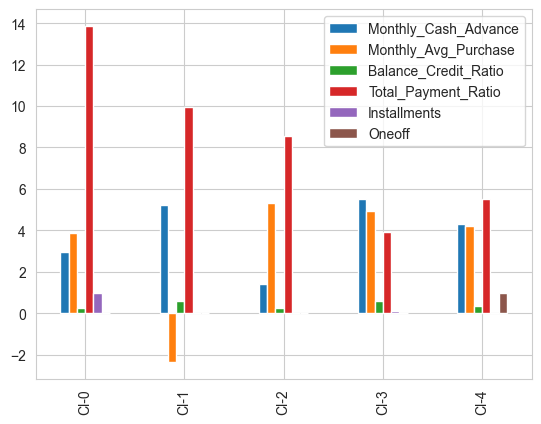

In [101]:
final_df_5.plot(kind = "bar")

plt.show()

### Insights with 5 Clusters
----
<big>
    
- We have a group of customers (cluster-2) having highest average purchases but there is cluster-3 also having highest cash advance and second highest purchase behaviour but their type of purchases are same

- Cluster 1 and Cluster 3 are behaving similar interms of balance to credit ratio and their monthly cash advances is also on higher side
----
**So we don't have quite distinguished characters with 5 clusters**

## Marketing Strategy Suggested Cluster 4
---

### Group 0 
   - They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can <i>increase credit limit or can lower down interest rate. Promote premium cards/loyality cards</i> to increase transcations.
   
### Group 1
   - These customers are taking maximum cash advance, these customers should be given remainders for payments. Offers can be provided on early payments to improve their payment rate.


###  Group 2
   - This is performing best among all the clusters are maintaining highest monthly average purchases. Giving any reward points might increase their purchases.
   
### Group 3
   - This group is doing maximum oneoff payments(may be for bills only). Customers of this group can be offered discount/offer on next transactions upon full payment.
   